# WEBSITE VS MOBILE APP PREDICTIVE MODEL - LINEAR REGRESSION

The project consists in a company that is trying to decide whether to focus its efforts on its mobile application experience or on its website. It's an New York City-based e-commerce company that sells clothing online, but that also have clothing and style consulting sessions in store. Customers enter the store, have sessions / meetings with a personal stylist, then they can go home and order from a mobile app or website for the clothing they want.

This dataset contains the following features: customer information such as Email, Address and your Avatar color. Then it also has columns of numeric values:

*Avg. Session Length: Average time of style consulting sessions in the store.

*Time on App: average time spent in the app in minutes.

*Time on Website: average time spent on the website in minutes.

*Lenght of Membership: How many years has the customer been a member.



## 1. Imports/Readings

In [10]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#Output of plotting commands is displayed inline, directly below the code cell that produced it
%matplotlib inline

In [11]:
#Read training data
customers = pd.read_csv("Ecommerce Customers")

## 2. Data understanding

In [12]:
#Returns the first n rows
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [13]:
#View some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [14]:
#Get a concise summary of the dataframe
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


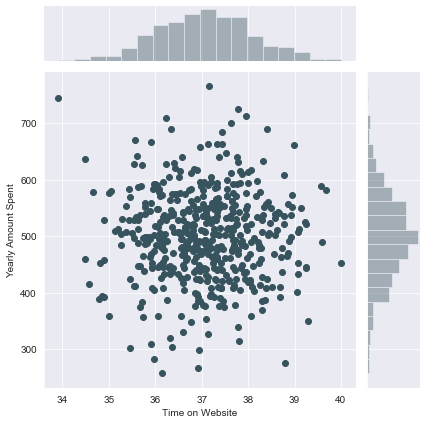

In [15]:
#Analysis Time on Website vs Yearly Amount Spent: has expected more time on the website, corresponds to more money spent
sns.set_palette("GnBu_d")
sns.set_style('darkgrid')
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

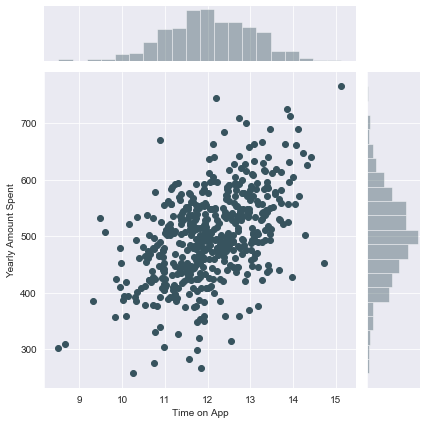

In [16]:
#Analysis Time on App vs Yearly Amount Spent: has expected more time on the app, corresponds to more money spent
sns.set_style('darkgrid')
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

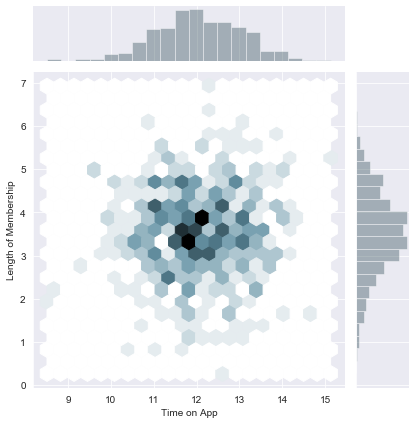

In [17]:
#Analysis Time on App vs Length of Membership: has expected usually more time on the app, corresponds to more length of membership
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers)

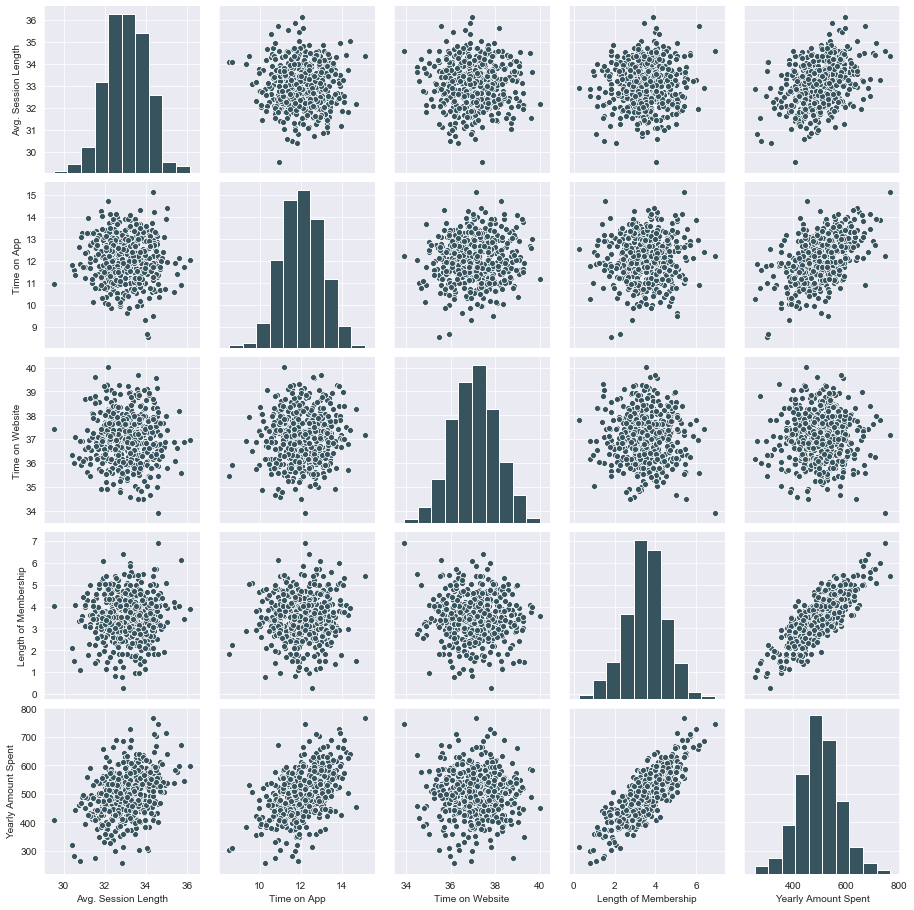

In [18]:
#Overview of the different variables of the dataset in study: the characteristic most correlated with the annual amount spent (Yearly Amount Spent) is the length of membership 
sns.pairplot(customers)

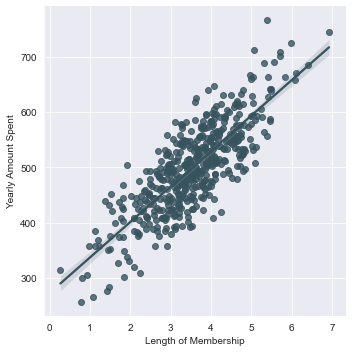

In [19]:
#Analysis Length of Membership vs Yearly Amount Spent: confirming the previous statement
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

## 3. Predictive Model

In [27]:
#Independent Variables
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]
MAE: 7.228148653430819
MSE: 79.81305165097427
RMSE: 8.933815066978624


,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


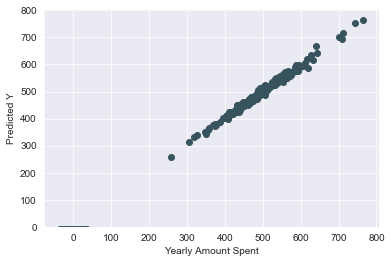

In [28]:
#Variable target
y = customers['Yearly Amount Spent']
              
#Split the data to train/testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#Implement the predictive model (linear regression)
lm = LinearRegression()
lm.fit(X_train,y_train)

#Model Coefficients
print('Coefficients: \n', lm.coef_)

#Apply the predictive model (linear regression)
predictions = lm.predict( X_test)

#Scatterplot of the test data vs predicted data
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

#Evaluate the performance of the model by calculating the residual sum of squares and the explained variance score (R ^ 2)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

#Explore waste to ensure everything is fine with the data
sns.distplot((y_test-predictions),bins=50);

#Final analysis (should the company invest in the website or the app?):First, the company should probably find other ways to 
#retain its customer, since this is the variable that most influences the spending of its users. Between site and app, it 
#sould invest in the app, given that it has a significantly higher coefficient than the site.

#Interpreting the coefficients:
#Keeping all other variables constant, an increase of 1 unit in the average usage time is associated with an increase of $ 25.98
#total spent.

#Keeping all other variables constant, an increase of 1 unit in the time spent on the App is associated with an increase of $ 
#38.59 total spent.

#Keeping all other variables constant, an increase of 1 unit in time on the site is associated with an increase of $ 0.19 in 
#dollars.

#Keeping all other variables constant, an increase of 1 unit in the Association time is associated with an increase of $ 61.27 
#in dollars.

coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients